In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from delphi.core import *
from future.utils import lfilter

In [3]:
json_ld_files_dir = '../data/52_docs_jsonlds/*.jsonld'
relevant_concepts=['conflict', 'food_security', 'precipitation']

def isGoodStatement(s):
    return (is_well_grounded(s) 
            and contains_relevant_concept(s, relevant_concepts))

good_statements = lfilter(isGoodStatement,
                    get_indra_statements_from_directory(json_ld_files_dir))

100%|██████████| 52/52 [00:04<00:00, 11.77it/s]


In [4]:
import pandas as pd

pd.options.display.max_colwidth=1000
pd.options.display.width=1000
columns = [
    'subj_text',
    'canonical name (subj)',
    'un (subj)',
    'obj_text',
    'canonical name (obj)',
    'un (obj)',
    'sentence',
]

df = pd.DataFrame([
    (
        x[1].subj.db_refs['TEXT'].replace('\n',' '),
        x[1].subj,
        (x[1].subj.db_refs['UN'][0][0].split('/')[-1],
         f"{top_grounding_score(x[1].subj):.2f}"),
        x[1].obj.db_refs['TEXT'].replace('\n',' '),
        x[1].obj,
        (x[1].obj.db_refs['UN'][0][0].split('/')[-1],
         f"{top_grounding_score(x[1].obj):.2f}"),
        x[1].evidence[0].text.replace('\n',' '),
    ) for x in list(enumerate(good_statements))],
    columns=columns
)
df

,subj_text,canonical name (subj),un (subj),obj_text,canonical name (obj),un (obj),sentence
0,abundant rains in October,rain,"(precipitation, 0.82)",cassava,cassava,"(crop, 0.85)","abundant rains in October and November improved yields of late-sown crops, late-maturing sorghum varieties and cassava"
1,State Sorghum 3.2 Factors,sorghum,"(crop, 0.82)",3.2.1 Rainfall Maize The remote sensing rainfall estimates,Rainfall Maize The sense rainfall,"(precipitation, 0.73)",State Sorghum 3.2 Factors affecting yields 3.2.1 Rainfall Maize The remote sensing rainfall estimates
2,abundant rains in October,rain,"(precipitation, 0.82)",late-maturing sorghum varieties,sorghum variety,"(crop, 0.73)","abundant rains in October and November improved yields of late-sown crops, late-maturing sorghum varieties"
3,conflict,conflict,"(conflict, 0.80)",crop production,crop production,"(crop_technology, 0.71)","conflict into the most productive state of the country, which also led to a sharp decrease in cultivated area and crop production"
4,rainfall,rainfall,"(precipitation, 0.88)",crop development in parts of Eastern Equatoria,crop development,"(crop_technology, 0.76)",rainfall deficits affected crop development in parts of Eastern Equatoria
5,rain,rain,"(precipitation, 0.82)",crop development,crop development,"(crop_technology, 0.76)",rain supported vegetation growth and crop development
6,conflict,conflict,"(conflict, 0.80)",life-saving emergency assistance,emergency assistance,"(intervention, 0.80)",life-saving emergency assistance for 1.5 million people directly affected by conflict
7,rain,rain,"(precipitation, 0.82)",vegetation growth,vegetation,"(flora, 0.81)",rain supported vegetation growth
8,rainfall,rainfall,"(precipitation, 0.88)",rains,rain,"(precipitation, 0.82)","rains progressed well until mid-2015, but from August onwards, areas of Eastern Equatoria, Central Equatoria and Jonglei states were affected by significant rainfall"
9,other commodities to local markets,commodity market,"(market, 0.81)",overall food expenditure levels,food expenditure,"(food_security, 0.72)",other commodities to local markets led to a sharp increase in overall food expenditure levels


In [5]:
good_statement_indices=[0, 2, 3, 4, 5, 6, 8, 10, 11, 14, 15, 16, 17, 18, 19, 
                       20, 21, 22, 24, 26, 27, 29, 32, 36, 37, 38, 39, 40, 44,
                       45, 46, 47, 48, 50, 54, 57, 58, 82, 85, 91, 113, 114, ]

manually_selected_statements = [good_statements[i] for i in good_statement_indices]

In [6]:
CAG = construct_CAG_skeleton(manually_selected_statements)

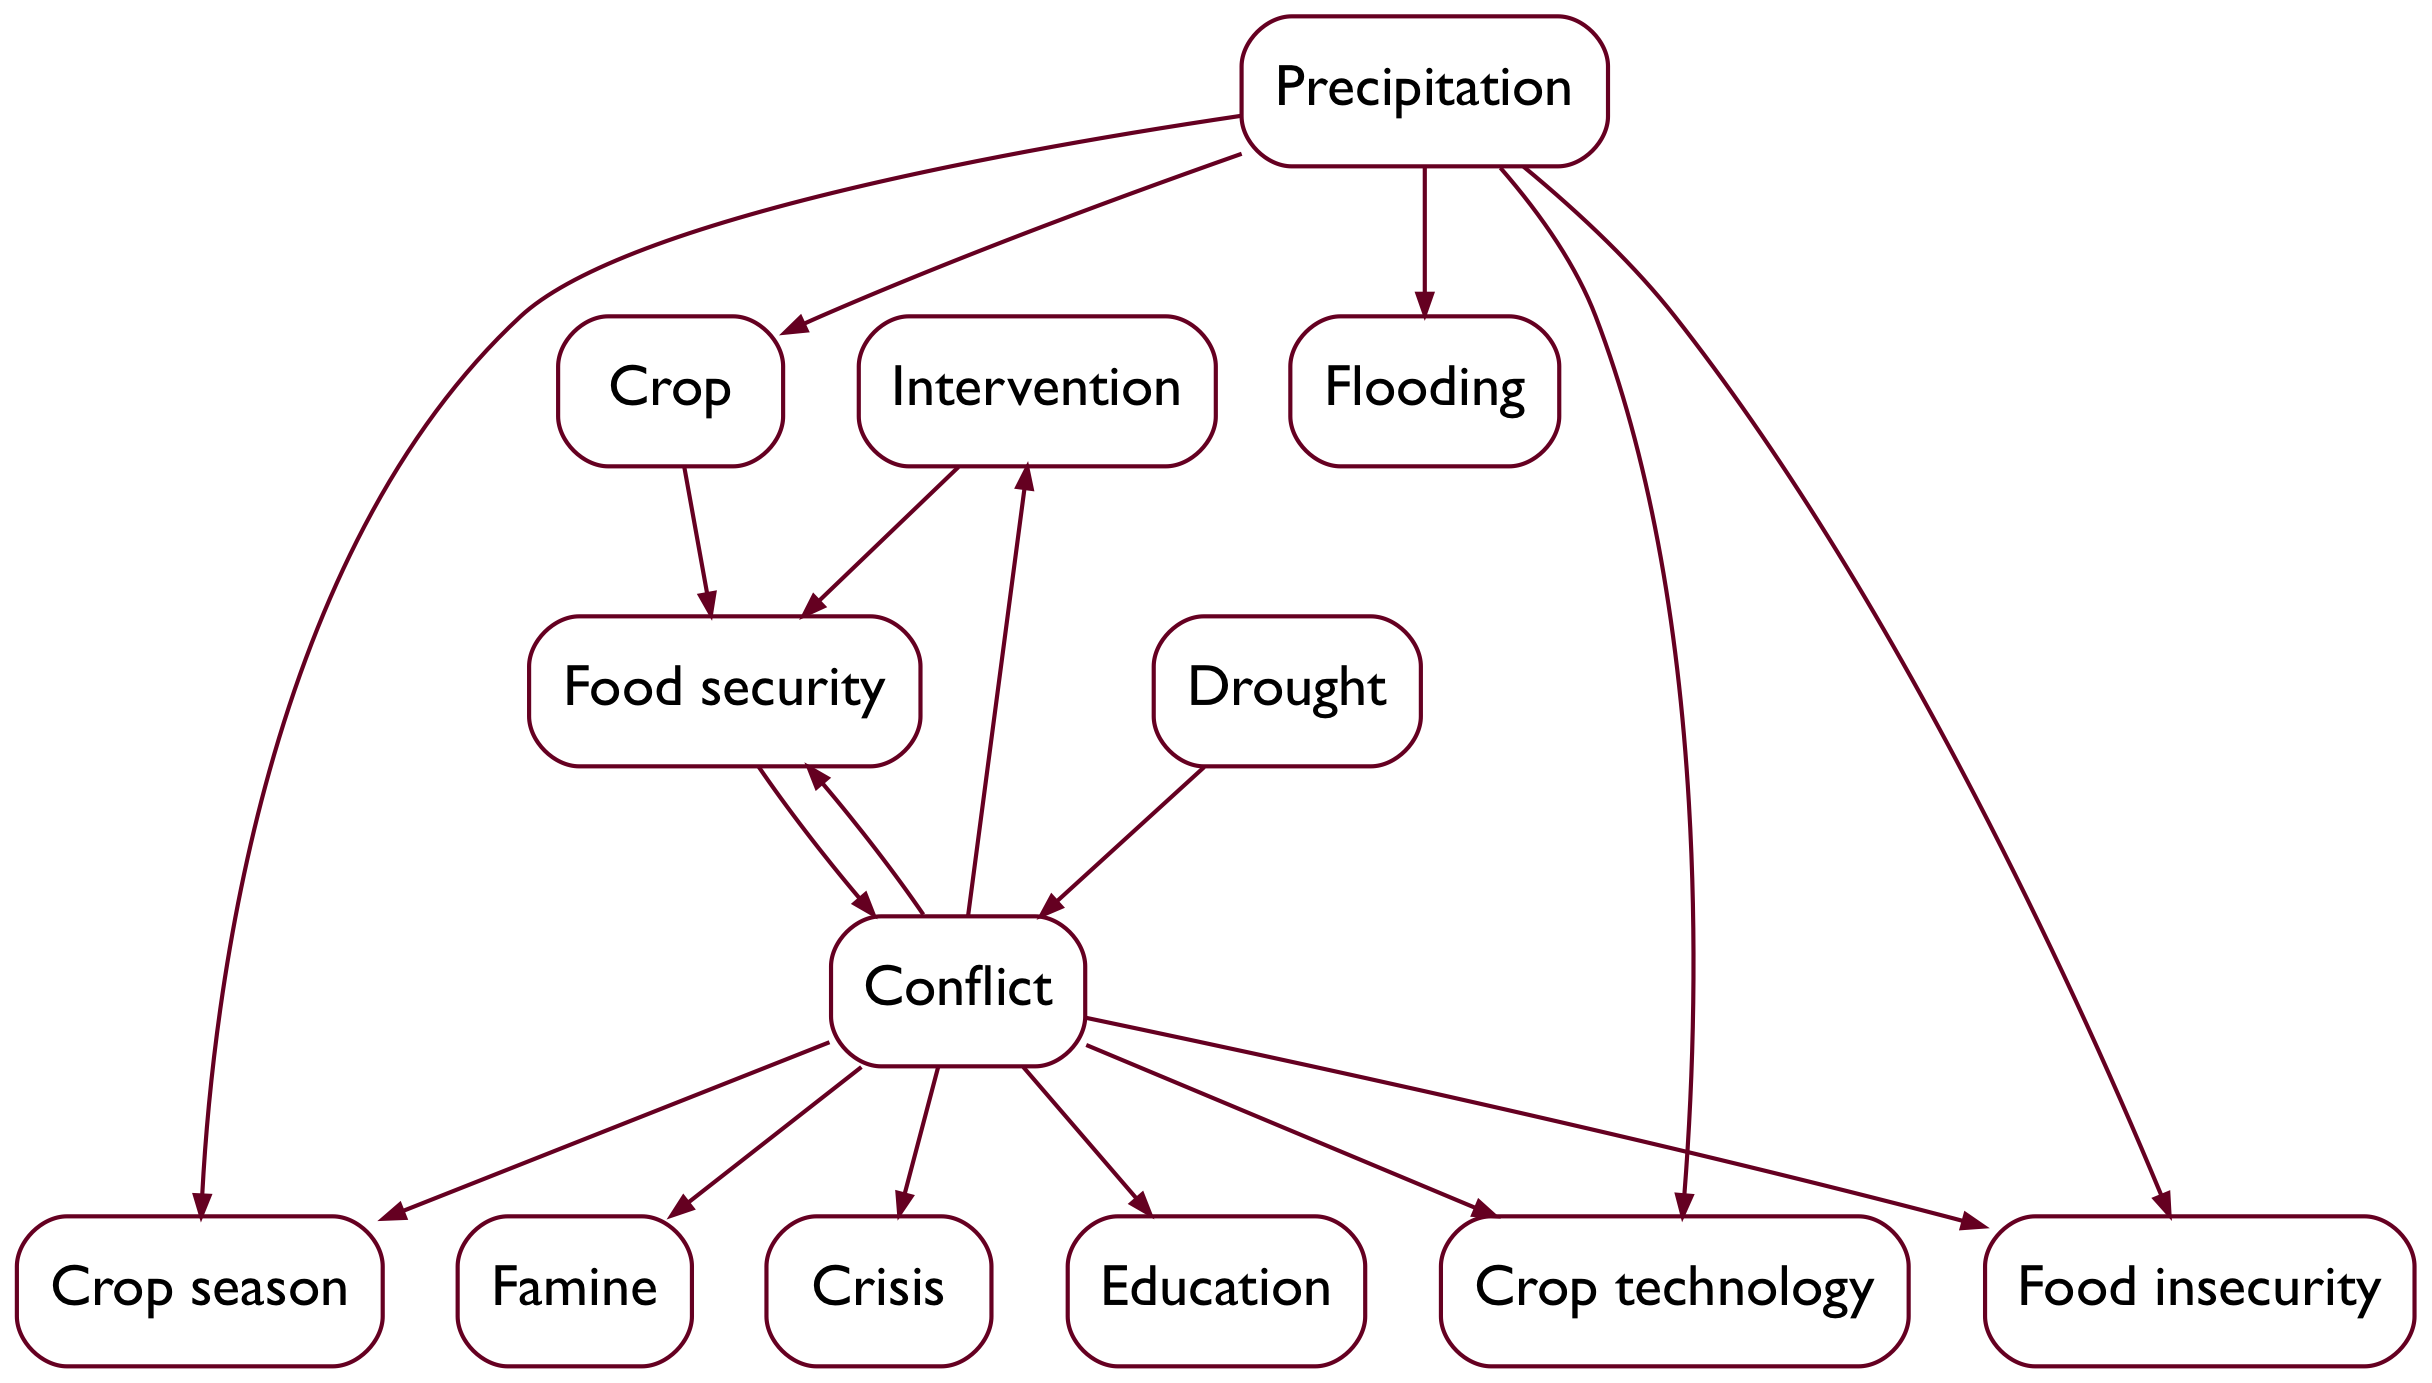

In [7]:
import networkx as nx
from IPython.display import Image
A = nx.nx_agraph.to_agraph(nx.DiGraph(
    [(e[0].capitalize(), e[1].capitalize())
     for e in CAG.edges()]))

A.graph_attr['dpi']=300
A.edge_attr.update({'arrowsize': 0.5, 'color': '#650021'})
A.node_attr.update({
    'shape': 'rectangle', 'color': '#650021',
    'style':'rounded', 'fontname':'Gill Sans',
})
Image(A.draw(format='png', prog='dot'))

In [31]:
CAG = set_indicators(CAG)
df = get_faostat_data('../data/south_sudan_data.csv')

In [35]:
CAG = set_indicator_initial_values(CAG, '2012', df)

In [36]:
for n in CAG.nodes(data=True):
    indicators = n[1]['indicators']
    print(n[0])
    if indicators is not None:
        for ind in indicators:
            print(ind)

intervention
food security
Indicator(name='Rail lines density', initial_value=9500.0)
Indicator(name='Gross domestic product per capita (in purchasing power equivalent)', initial_value=884.5936849999998)
Indicator(name='Political stability and absence of violence/terrorism', initial_value=-1.2)
Indicator(name='Access to improved water sources', initial_value=58.7)
Indicator(name='Access to improved sanitation facilities', initial_value=6.6)
conflict
food insecurity
crisis
education
crop season
crop technology
famine
drought
crop
precipitation
flooding
